In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
result_df = joblib.load("result_df")

In [3]:
result_df[result_df["Evaluation Metric"] == "AUC"]


,Anomaly Detection Method,Characteristic,Evaluation Metric,Metric Score,Metric Score Upper,Metric Score Lower
0,anomalous,seasonality,AUC,0.601361,0.726579,0.476144
4,anomalous,trend,AUC,0.582984,0.704483,0.461485
8,anomalous,conceptdrift,AUC,0.553890,0.628737,0.479044
12,anomalous,missing,AUC,0.609869,0.759121,0.460617
16,fb,seasonality,AUC,0.886004,0.981458,0.790551
20,fb,trend,AUC,0.907818,1.062825,0.752810
24,fb,conceptdrift,AUC,0.917021,0.987803,0.846240
28,fb,missing,AUC,0.952734,0.993753,0.911715
32,glim,seasonality,AUC,0.946293,1.026947,0.865639
36,glim,trend,AUC,0.946947,1.042016,0.851878


## Seasonality

In [4]:
seasonality = result_df[(result_df["Evaluation Metric"] == "AUC") & (result_df["Characteristic"]=="seasonality")]

seasonality

,Anomaly Detection Method,Characteristic,Evaluation Metric,Metric Score,Metric Score Upper,Metric Score Lower
0,anomalous,seasonality,AUC,0.601361,0.726579,0.476144
16,fb,seasonality,AUC,0.886004,0.981458,0.790551
32,glim,seasonality,AUC,0.946293,1.026947,0.865639
48,hstree,seasonality,AUC,0.821758,0.989212,0.654304
64,htm,seasonality,AUC,0.876376,0.970648,0.782105
80,matrix_profile,seasonality,AUC,0.825033,0.954616,0.695449
96,pbad,seasonality,AUC,0.525022,0.738892,0.311152
112,sarimax,seasonality,AUC,0.793356,0.965444,0.621267
128,stl,seasonality,AUC,0.824182,0.976257,0.672107
144,twitter,seasonality,AUC,0.678816,0.828240,0.529392


In [5]:
ci = []
for x,y in zip(seasonality["Metric Score Upper"].values, seasonality["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [seasonality["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

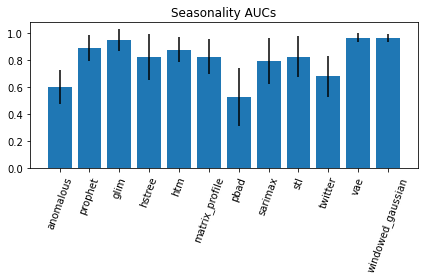

In [6]:
the_labels = []
for label in seasonality["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)

plt.figure()
plt.bar(range(seasonality.shape[0]), seasonality["Metric Score"].values,yerr=y_r)
plt.xticks(range(seasonality.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Seasonality AUCs")
plt.tight_layout()
plt.savefig("seasonality_auc.eps",format="eps")
# plt.show()

In [7]:
seasonality["Rank"] = seasonality["Metric Score"].rank(ascending=False) 
seasonality[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
0,anomalous,11.0
16,fb,4.0
32,glim,3.0
48,hstree,8.0
64,htm,5.0
80,matrix_profile,6.0
96,pbad,12.0
112,sarimax,9.0
128,stl,7.0
144,twitter,10.0


## Trend

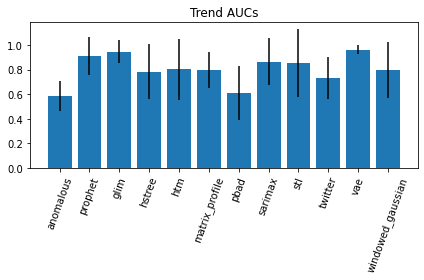

In [8]:
trend = result_df[(result_df["Evaluation Metric"] == "AUC") & (result_df["Characteristic"]=="trend")]
ci = []
for x,y in zip(trend["Metric Score Upper"].values, trend["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [trend["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in trend["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)


plt.figure()
plt.bar(range(trend.shape[0]), trend["Metric Score"].values,yerr=y_r)
plt.xticks(range(trend.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Trend AUCs")
plt.tight_layout()
plt.savefig("trend_auc.eps",format="eps")
# plt.show()

In [9]:
trend["Rank"] = trend["Metric Score"].rank(ascending=False) 
trend[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
4,anomalous,12.0
20,fb,3.0
36,glim,2.0
52,hstree,9.0
68,htm,6.0
84,matrix_profile,7.0
100,pbad,11.0
116,sarimax,4.0
132,stl,5.0
148,twitter,10.0


## Concept Drift

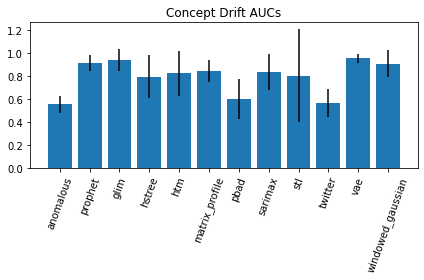

In [10]:
conceptdrift = result_df[(result_df["Evaluation Metric"] == "AUC") & (result_df["Characteristic"]=="conceptdrift")]
ci = []
for x,y in zip(conceptdrift["Metric Score Upper"].values, conceptdrift["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [conceptdrift["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in conceptdrift["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)

plt.figure()
plt.bar(range(conceptdrift.shape[0]), conceptdrift["Metric Score"].values,yerr=y_r)
plt.xticks(range(conceptdrift.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Concept Drift AUCs")
plt.tight_layout()
plt.savefig("cd_auc.eps",format="eps")
# plt.show()

In [11]:
conceptdrift["Rank"] = conceptdrift["Metric Score"].rank(ascending=False) 
conceptdrift[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
8,anomalous,12.0
24,fb,3.0
40,glim,2.0
56,hstree,9.0
72,htm,7.0
88,matrix_profile,5.0
104,pbad,10.0
120,sarimax,6.0
136,stl,8.0
152,twitter,11.0


## Missing

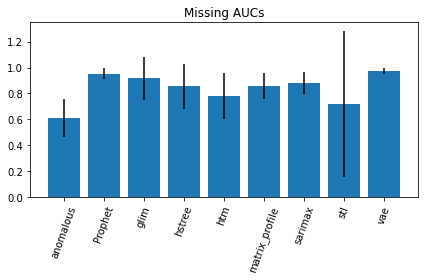

In [12]:
missing = result_df[(result_df["Evaluation Metric"] == "AUC") & (result_df["Characteristic"]=="missing")]

# remove rows with windowed_gaussian, twitter, pbad
a = ["windowed_gaussian", "twitter", "pbad"]
missing_new = missing[~missing["Anomaly Detection Method"].isin(a)]

ci = []
for x,y in zip(missing_new["Metric Score Upper"].values, missing_new["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [missing_new["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in missing_new["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("Prophet")
    else:
        the_labels.append(label)

plt.figure()
plt.bar(range(missing_new.shape[0]), missing_new["Metric Score"].values,yerr=y_r)
plt.xticks(range(missing_new.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Missing AUCs")
plt.tight_layout()
plt.savefig("missing_auc.eps",format="eps")
# plt.show()

In [14]:
missing_new["Rank"] = missing_new["Metric Score"].rank(ascending=False) 
missing_new[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
12,anomalous,9.0
28,fb,2.0
44,glim,3.0
60,hstree,6.0
76,htm,7.0
92,matrix_profile,5.0
124,sarimax,4.0
140,stl,8.0
172,vae,1.0
